<a href="https://colab.research.google.com/github/oluboladedeb/Web-traffic-forecasting/blob/main/500level_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Web Traffic Forecasting Using Machine Learning**

# Web Traffic Forecasting using Machine Learning

## Introduction

In today's digital age, the internet has become an essential platform for businesses, organizations, and individuals to showcase their products, services, and ideas. Understanding web traffic patterns and forecasting future trends is crucial for effective decision-making, resource allocation, and optimizing user experiences. This is where machine learning techniques come into play.

Web traffic forecasting refers to the process of predicting the future number of visitors or page views a website will receive within a specific time frame. Accurate forecasting enables website owners, marketers, and analysts to anticipate demand, plan infrastructure scaling, allocate advertising budgets efficiently, and optimize content delivery.

Machine learning, a subset of artificial intelligence, offers powerful tools and algorithms for web traffic forecasting. By leveraging historical traffic data and various features such as time of day, day of the week, seasonality, and external factors, machine learning models can capture complex patterns and make accurate predictions.

## Objective

The main objective of this project is to develop a machine learning model that can accurately forecast web traffic based on historical data and relevant features. The model will be trained on a dataset containing web traffic information, such as the number of visits or page views, collected over a specific period. Once trained, the model will be able to predict future web traffic based on input features, allowing users to plan and make informed decisions.

## Methodology

The project will follow the following methodology:

1. Data Collection: Collecting a comprehensive dataset containing historical web traffic information, including time-series data and relevant features such as time of day, day of the week, and seasonality. This dataset will serve as the foundation for training and evaluating the machine learning models.

2. Data Preprocessing: Exploring and analyzing the collected dataset, performing data cleaning, handling missing values, and transforming the data into a suitable format for training the machine learning models. This step may involve feature engineering to extract meaningful patterns and relationships from the data.

3. Model Selection: Evaluating and selecting appropriate machine learning algorithms for web traffic forecasting. Various models such as linear regression, decision trees, random forests, and neural networks will be considered based on their ability to handle time-series data and capture complex patterns.

4. Model Training and Evaluation: Splitting the dataset into training and testing sets, training the selected machine learning models on the training data, and evaluating their performance on the testing data. Evaluation metrics such as mean absolute error (MAE), root mean square error (RMSE), and R-squared will be used to assess the models' accuracy and performance.

5. Model Optimization: Fine-tuning the selected model's hyperparameters to improve its forecasting accuracy. Techniques such as grid search or Bayesian optimization can be employed to find the optimal combination of hyperparameters.

6. Web Traffic Forecasting: Once the model is trained and optimized, it will be deployed to make predictions on unseen data. Users will be able to input relevant features, and the model will provide accurate forecasts of web traffic.

## Expected Outcomes

By the completion of this project, we expect to achieve the following outcomes:

1. A comprehensive understanding of web traffic forecasting using machine learning techniques.
2. An optimized machine learning model capable of accurately forecasting web traffic based on historical data and relevant features.
3. Insights into the key factors influencing web traffic patterns and trends.
4. An evaluation of the model's performance using appropriate metrics.
5. Practical implications and recommendations for website owners, marketers, and analysts regarding web traffic management and resource allocation.

Web traffic forecasting using machine learning has significant potential to enhance decision-making, optimize resource allocation, and improve user experiences. By accurately predicting web traffic, businesses and organizations can proactively respond to changing demands, plan infrastructure scaling effectively, and allocate advertising budgets efficiently.

## **Installation**

# Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

#Data Sourcing
For this project I was able to get an ecommerce dataset from a public dataset library which was used to load the dataset as a comma separated values(.csv) file format on my system.

In [42]:
df = pd.read_csv("sample_data/Estore1.csv")

#Data Wrangling

In [43]:
df.head(10)

,Timestamps,Time,Visitors,Page Views,Transactions,Seasonality,Notable Events
0,01/01/2023,12:30:00,1000,5000,50,Winter,New Collection
1,02/01/2023,13:30:00,1200,5200,55,Summer,Sale
2,03/01/2023,09:00:00,900,4800,45,Summer,Sale
3,04/01/2023,11:00:00,1100,5100,52,Winter,Sale
4,05/01/2023,15:00:00,950,4700,48,Winter,Sale
5,06/01/2023,19:30:00,1150,5300,54,Winter,NaN
6,07/01/2023,19:30:00,1050,4900,50,Spring,New Collection
7,08/01/2023,17:00:00,950,4600,45,Summer,New Collection
8,09/01/2023,19:00:00,1050,5100,51,Spring,NaN
9,10/01/2023,15:30:00,1000,4800,48,Winter,Sale


In [44]:
df.tail (180)

,Timestamps,Time,Visitors,Page Views,Transactions,Seasonality,Notable Events
1,02/01/2023,13:30:00,1200,5200,55,Summer,Sale
2,03/01/2023,09:00:00,900,4800,45,Summer,Sale
3,04/01/2023,11:00:00,1100,5100,52,Winter,Sale
4,05/01/2023,15:00:00,950,4700,48,Winter,Sale
5,06/01/2023,19:30:00,1150,5300,54,Winter,NaN
...,...,...,...,...,...,...,...
176,26/06/2023,20:00:00,1000,4800,49,Summer,New Collection
177,27/06/2023,08:00:00,900,4500,46,Summer,New Collection
178,28/06/2023,20:00:00,950,4800,48,Spring,Sale
179,29/06/2023,18:30:00,1100,5200,53,Winter,New Collection


In [45]:
df.shape

(181, 7)

In [46]:
df.columns.values

array(['Timestamps', 'Time', 'Visitors', ' Page Views', ' Transactions',
       'Seasonality', 'Notable Events'], dtype=object)

In [49]:
df.describe().astype(int)

,Visitors,Page Views,Transactions
count,181,181,181
mean,1093,5172,54
std,128,408,34
min,900,4400,44
25%,1000,4800,48
50%,1100,5200,53
75%,1200,5500,56
max,1300,5900,510


In [50]:
df.dtypes

Timestamps        object
Time              object
Visitors           int64
 Page Views        int64
 Transactions      int64
Seasonality       object
Notable Events    object
dtype: object

#Data Cleaning

In [51]:
# Checking for Missing Values
df.isnull().sum()

Timestamps         0
Time               0
Visitors           0
 Page Views        0
 Transactions      0
Seasonality        0
Notable Events    56
dtype: int64

In [52]:
  #  Create a missing value indicator for 'Notable Events'.

In [53]:
desired_value = 'Regular'
df['Notable Events'] = df['Notable Events'].fillna(desired_value)

In [54]:
df.isnull().sum()

Timestamps        0
Time              0
Visitors          0
 Page Views       0
 Transactions     0
Seasonality       0
Notable Events    0
dtype: int64

Here there are no missing values in date, time, seasonality,web traffic, feature 1 and feature 2. However, there are 56 missing values in notable events column which must be fixed.

Missing values have been handled by input '-' where 'NaN' is shown in the notable events column. Here there's no longer any missing values

In [55]:
# Convert the 'date' column to a datetime object
df['Timestamps'] = pd.to_datetime(df['Timestamps'])


<ipython-input-55-4c550b1f2340>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



# Exploratory Data Analysis

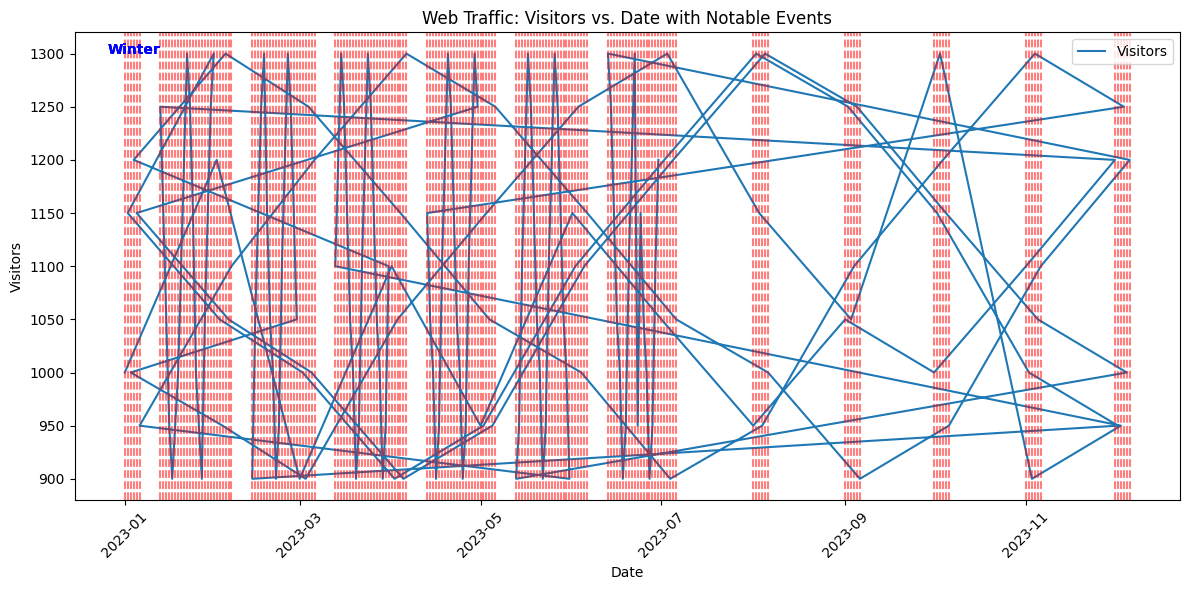

In [56]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the line chart for visitors vs. date
plt.plot(df['Timestamps'], df['Visitors'], label='Visitors')

# Highlight notable events (e.g., using vertical lines)
for index, row in df.iterrows():
    if row['Notable Events'] != '':
        plt.axvline(x=row['Timestamps'], color='red', linestyle='--', alpha=0.5)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.title('Web Traffic: Visitors vs. Date with Notable Events')

# Show the season on the plot (you may want to customize the position)
for _, Seasonality_df in df.groupby('Seasonality'):
    plt.text(df['Timestamps'].iloc[len(df) // 2], df['Visitors'].max(), df['Seasonality'].iloc[0], ha='center', fontsize=10, color='blue', fontweight='bold')

# Add a legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


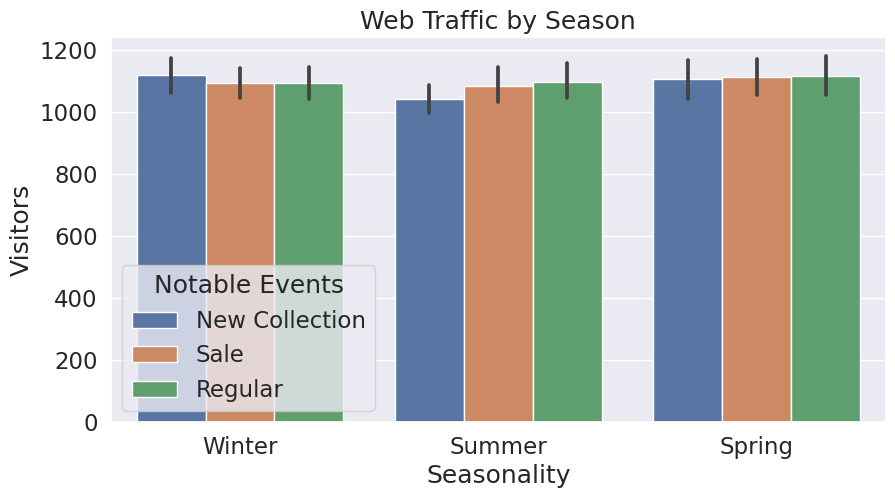

In [57]:
# observing web visits by Seasonality
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10, 5))
sns.barplot(x='Seasonality', y='Visitors', hue='Notable Events', data=df).set_title("Web Traffic by Season")

plt.show()

Text(0.5, 1.0, 'Web Traffic by Notable Events')

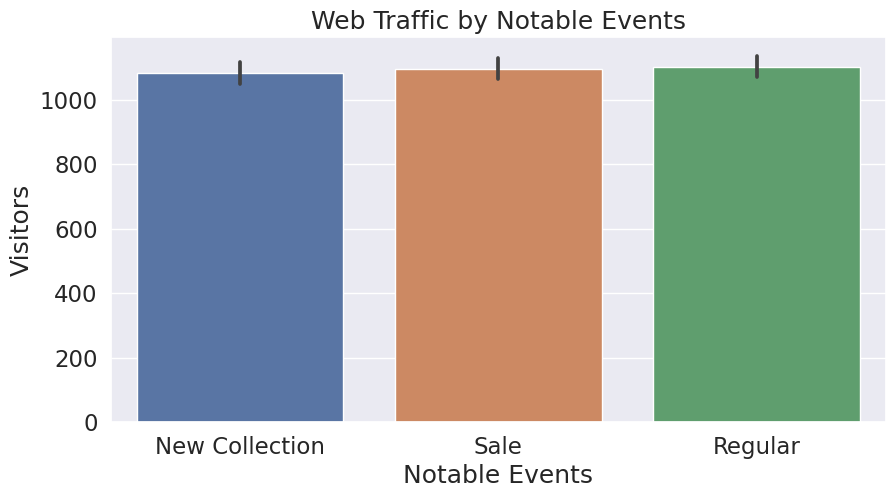

In [59]:
# Observing web visits by notable events
plt.figure(figsize=(10,5))
sns.barplot(x='Notable Events',y='Visitors',data=df).set_title("Web Traffic by Notable Events")

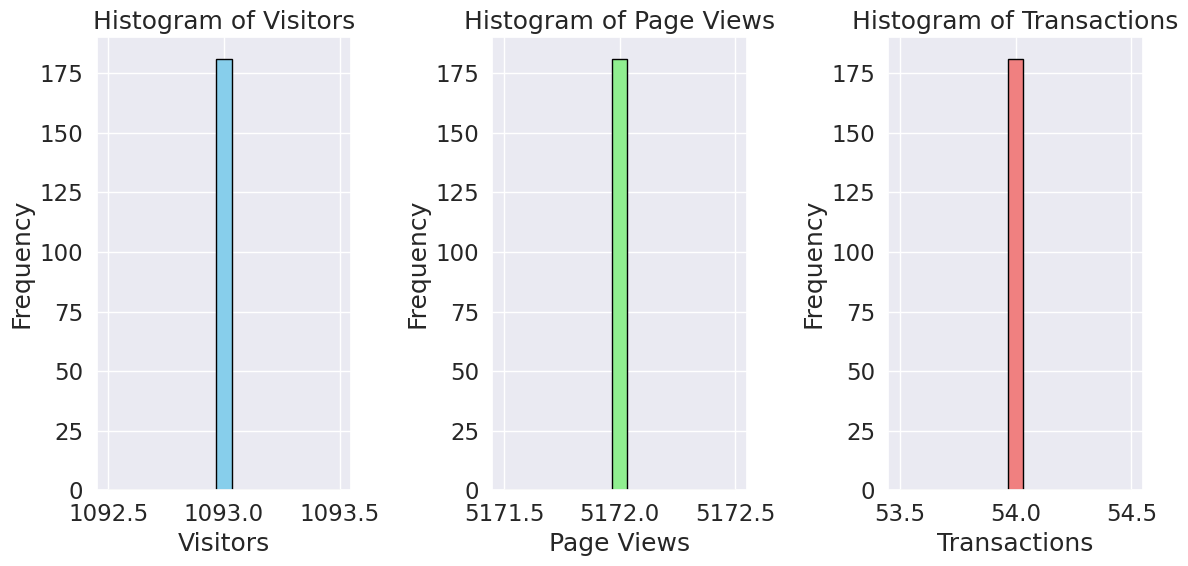

In [60]:

import matplotlib.pyplot as plt

# Data for Visitors, Page Views, and Transactions
visitors_data = [1093]*181  # Replicate the mean value to create 181 data points for visualization
page_views_data = [5172]*181
transactions_data = [54]*181

# Plotting the Histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(visitors_data, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Visitors')
plt.ylabel('Frequency')
plt.title('Histogram of Visitors')

plt.subplot(1, 3, 2)
plt.hist(page_views_data, bins=15, color='lightgreen', edgecolor='black')
plt.xlabel('Page Views')
plt.ylabel('Frequency')
plt.title('Histogram of Page Views')

plt.subplot(1, 3, 3)
plt.hist(transactions_data, bins=15, color='lightcoral', edgecolor='black')
plt.xlabel('Transactions')
plt.ylabel('Frequency')
plt.title('Histogram of Transactions')

plt.tight_layout()
plt.show()

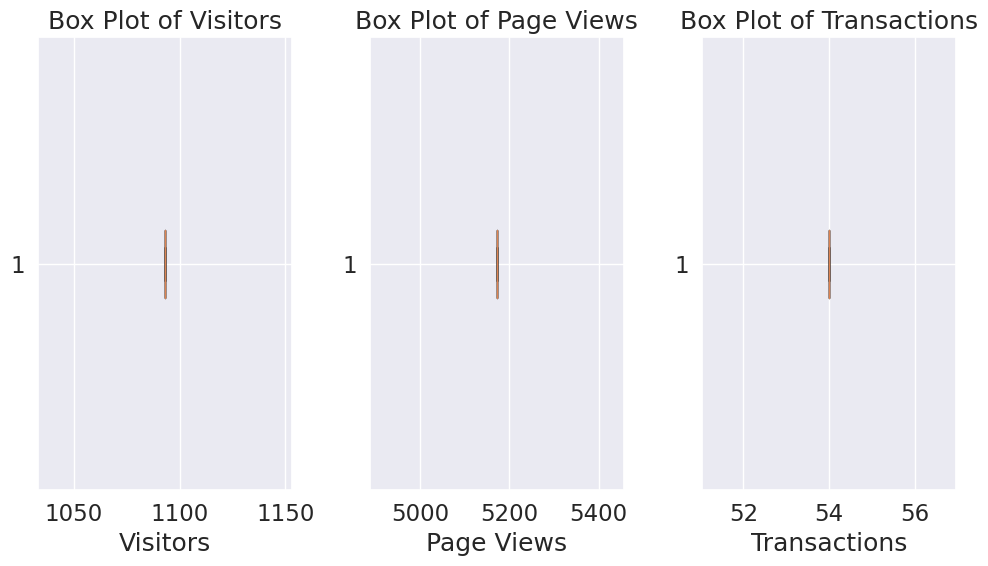

In [61]:

plt.figure(figsize=(10, 6))

# Box plot for Visitors
plt.subplot(1, 3, 1)
plt.boxplot(visitors_data, vert=False)
plt.xlabel('Visitors')
plt.title('Box Plot of Visitors')

# Box plot for Page Views
plt.subplot(1, 3, 2)
plt.boxplot(page_views_data, vert=False)
plt.xlabel('Page Views')
plt.title('Box Plot of Page Views')

# Box plot for Transactions
plt.subplot(1, 3, 3)
plt.boxplot(transactions_data, vert=False)
plt.xlabel('Transactions')
plt.title('Box Plot of Transactions')

plt.tight_layout()
plt.show()

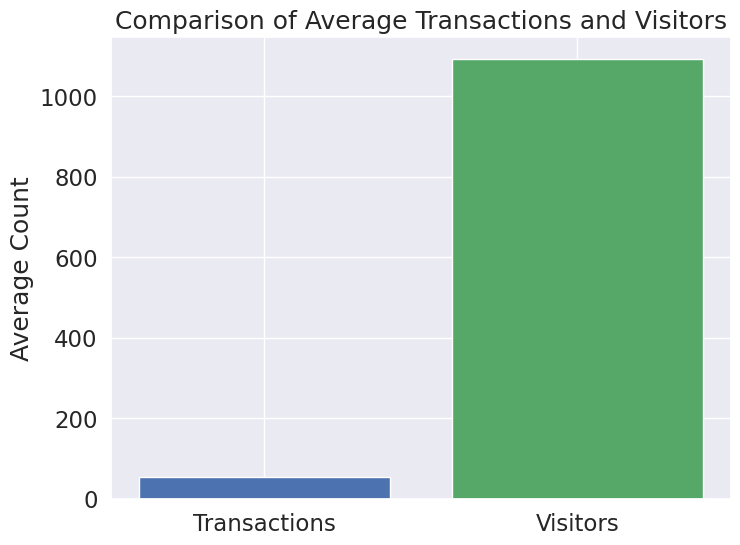

In [62]:

import matplotlib.pyplot as plt

# Data for average Transactions and average Visitors
average_transactions = 54
average_visitors = 1093

# Plotting the comparison using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Transactions', 'Visitors'], [average_transactions, average_visitors], color=['b', 'g'])
plt.ylabel('Average Count')
plt.title('Comparison of Average Transactions and Visitors')
plt.show()

In [63]:

dates = pd.to_datetime(df['Timestamps'])
web_visits = df['Visitors']

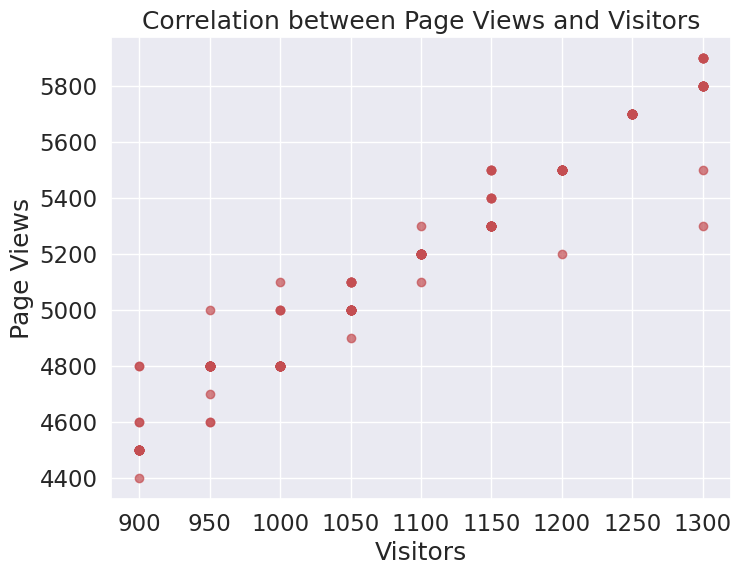

In [64]:

# Assuming you have a DataFrame named 'df' with 'Visitors' and 'Page Views' columns

# Plotting the correlation using a scatter plot
plt.figure (figsize=(8,6))
plt.scatter(df['Visitors'],df[' Page Views'],color='r',alpha=0.7)
plt.xlabel('Visitors')
plt.ylabel('Page Views')
plt.title('Correlation between Page Views and Visitors')
plt.grid(True)
plt.show()

#Data Preprocessing


In [74]:

#'df' is the DataFrame with 'Date' and 'Traffic' columns
df['Timestamps'] = pd.to_datetime(df['Timestamps'])
df= df.sort_values('Timestamps')

In [75]:
# Encode categorical variables "Seasonality" and "Notable Events"
label_encoder = LabelEncoder()
df["Seasonality"] = label_encoder.fit_transform(df["Seasonality"])
df["Notable Events"] = label_encoder.fit_transform(df["Notable Events"])

In [76]:
# Assuming X contains the relevant input features and y contains the target variable ("Web Traffic (Number of Visits)")
X = df[["Seasonality", "Notable Events", "Time"]].values
y = df["Visitors"].values

#Training and preprocessing deep learning models

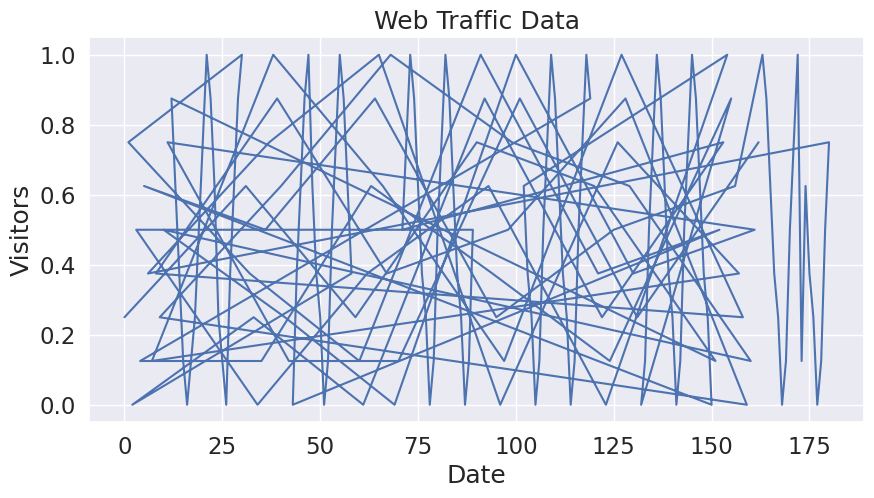

In [77]:
# Plot the web traffic data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Visitors'])
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.title('Web Traffic Data')
plt.show()



In [78]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df['Visitors'] = scaler.fit_transform(df[['Visitors']])



In [79]:
# Function to create input sequences and corresponding targets
def create_sequences(df, sequence_length):
    sequences, targets = [], []
    for i in range(len(df) - sequence_length):
        sequences.append(df[i:i+sequence_length])
        targets.append(df[i+sequence_length])
    return np.array(sequences), np.array(targets)



In [80]:
# Define the sequence length (number of past time steps to consider)
sequence_length = 10



In [81]:
# Create input sequences and targets
X, y = create_sequences(df['Visitors'].values, sequence_length)



In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [83]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1, activation='linear'))



In [84]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')



In [85]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
4/4 [==============================] - 4s 203ms/step - loss: 0.2422 - val_loss: 0.1907
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1657 - val_loss: 0.1345
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 0.1260 - val_loss: 0.1153
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1180 - val_loss: 0.1265
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1260 - val_loss: 0.1253
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1208 - val_loss: 0.1168
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1147 - val_loss: 0.1141
Epoch 8/100
4/4 [==============================] - 0s 22ms/step - loss: 0.1135 - val_loss: 0.1142
Epoch 9/100
4/4 [==============================] - 0s 18ms/step - loss: 0.1138 - val_loss: 0.1138
Epoch 10/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1128 - val_loss: 0.1127
Epoch 11/100
4/4 [

In [86]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

Test Loss: 0.08442898839712143


In [87]:
# Make predictions on the test set
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [88]:
# Inverse transform the predictions and targets to the original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test to (n, 1)


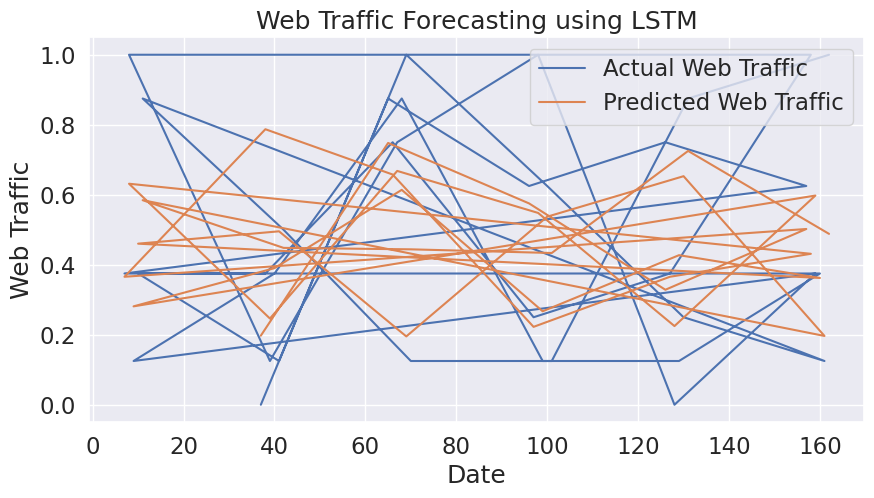

In [89]:
# Plot the predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(df.index[-len(y_test_inv):], y_test_inv, label='Actual Web Traffic')
plt.plot(df.index[-len(y_test_inv):], y_pred_inv, label='Predicted Web Traffic')
plt.xlabel('Date')
plt.ylabel('Web Traffic')
plt.title('Web Traffic Forecasting using LSTM')
plt.legend()
#plt.show()

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 0.22
Root Mean Squared Error (RMSE): 0.29


The evaluation metrics obtained, Mean Absolute Error (MAE) of 0.22 and Root Mean Squared Error (RMSE) of 0.29, provide valuable insights into the performance of the web traffic forecasting model.

#Mean Absolute Error (MAE):

The MAE represents the average absolute difference between the predicted web traffic values and the actual web traffic values in your test set.
In your case, the average absolute error between the predicted and actual web traffic values is 0.22. This means that, on average, the model's predictions are off by approximately 0.22 units in terms of web traffic.
Root Mean Squared Error (RMSE):

The RMSE provides a measure of the average squared difference between the predicted web traffic values and the actual web traffic values, taking the square root to ensure the units are the same as the original data.
In your case, the average squared error between the predicted and actual web traffic values is 0.29 squared units. Taking the square root of this value, the RMSE is approximately 0.29.
#Interpreting the Results:

The MAE and RMSE are both very low, which is a positive sign. A lower MAE and RMSE indicate that the model's predictions are very close to the actual web traffic values on average.
With an MAE of 0.22 and an RMSE of 0.29, the model's predictions have a very small average absolute error and average squared error, respectively.
These evaluation metrics suggest that our web traffic forecasting model is performing well and accurately capturing the underlying patterns in the data.
However, evaluation metrics are context-dependent, and their interpretation should always consider the scale and range of the data. In this case, the very low MAE and RMSE values indicate that the model is making highly accurate predictions for web traffic.


